In [1]:
from fastbook import *

In [19]:
urls = search_images_ddg('bird photos',max_images=1)
len(urls),urls[0]

(1, 'https://wallpapercave.com/wp/9UfwjXV.jpg')

In [20]:
dest = Path('bird.jps')
if not dest.exists(): download_url(urls[0],dest,show_progress=True)

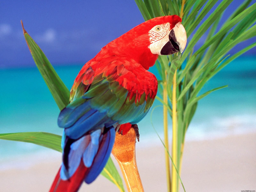

In [21]:
im = Image.open(dest)
im.to_thumb(256,256)

In [22]:
searches = 'forest', 'bird'
path = Path("bird_or_not")

if not path.exists():
    for i in searches:
        dest = (path/i)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{i} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest,max_size=400, dest=dest)

In [23]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

In [24]:
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [12]:
learn = cnn_learner(dls,resnet18,metrics = error_rate)
learn.fine_tune(3)

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [9]:
is_bird,_,probs = learn.predict(PILImage.create('forest.jpg'))
print(f"This is a : {is_bird}")
print(f"Probability it's a bird : {probs[0]:.4f}")
print(f"Probability it's a forest : {probs[1]:.4f}")

NameError: name 'learn' is not defined